In [1]:
# add parent dir to sys.path so we can import from repo base
import os; import sys; sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

from tsfresh.transformers import RelevantFeatureAugmenter

from script.dataset import get_data
from script.visualization import report_cm

In [3]:
leave_out = 'p1'

In [4]:
ts, y = get_data()

X = pd.DataFrame(index=y.index)
split = y.index.str.contains(leave_out)
X_train, X_test, y_train, y_test = (X[~split], X[split], y[~split], y[split])

In [5]:
ppl = Pipeline([
    ('augmenter', RelevantFeatureAugmenter(column_id='id', column_sort='time')),
    ('classifier', RandomForestClassifier())
])
ppl.set_params(augmenter__timeseries_container=ts);

In [6]:
ppl.fit(X_train, y_train)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:41<00:00,  1.65s/it]
/Users/jannisbaum/_/hpi/terms/msc-2/ds4w/.pyv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_similarity_count__query_None__threshold_0.0'
 'EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_4_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_5_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_6_cal__query_similarity_count__query_None__threshold_0.0'
 'E

Pipeline(steps=[('augmenter',
                 RelevantFeatureAugmenter(column_id='id', column_sort='time',
                                          timeseries_container=                id  time  EMG_0  EMG_1  EMG_2  EMG_3  EMG_4  EMG_5  EMG_6  \
0      0529_p0_4_1     0   1225    582    334    276    368    747   1042   
1      0529_p0_4_1     1   1312    640    331    278    382    820   1173   
2      0529_p0_4_1     2   1267    642    325    303    471    904   1183   
3      0529_p0_4_1     3   1207    619    306    292    467    889   1063   
4      0529_p0_4_1     4   1302    746    264    273    427    811   1068   
...            ...   ...    ...    ...    ...    ....
1      234.125926  332.792593  202.422222  
2      318.125926  342.792593  242.422222  
3      303.125926  222.792593  173.422222  
4      225.125926  227.792593  169.422222  
...           ...         ...         ...  
61207 -135.718563   12.329341  432.455090  
61208 -132.718563    1.329341  453.455090  
61209 -170.718563  -98.670659  265.455090  
61210 -180.718563 -115.670659  204.455090  
61211 -111.718563    7.329341  347.455090  

[61212 rows x 18 columns])),
                ('classifier', RandomForestClassifier())])

In [7]:
y_pred = ppl.predict(X_test)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:07<00:00,  3.38it/s]


# Results: p1

accuracy: 0.6375


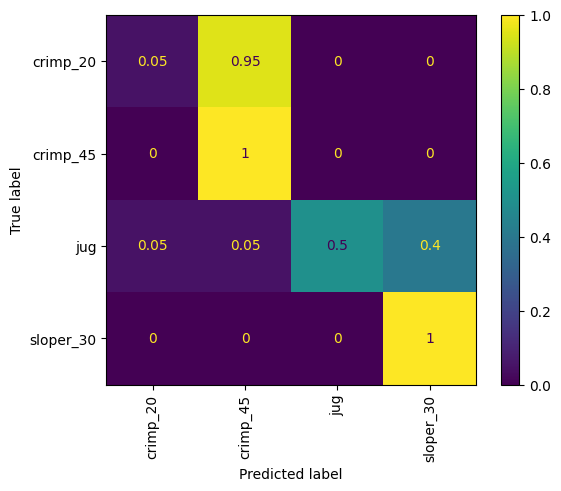

              precision    recall  f1-score   support

    crimp_20       0.50      0.05      0.09        20
    crimp_45       0.50      1.00      0.67        20
         jug       1.00      0.50      0.67        20
   sloper_30       0.71      1.00      0.83        20

    accuracy                           0.64        80
   macro avg       0.68      0.64      0.56        80
weighted avg       0.68      0.64      0.56        80



In [8]:
report_cm(f'Results: {leave_out}', y_test, y_pred, ppl.named_steps['classifier'].classes_)
print(classification_report(y_test, y_pred))